In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [76]:
churnData = pd.read_csv("DATA_Customer-Churn.csv")

In [6]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [7]:
churnData.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
#churnData[['TotalCharges']] = churnData[['TotalCharges']].apply(pd.to_numeric)
#print(churnData.dtypes)

churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')
print(churnData.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [10]:
# Calculate the mean of the "TotalCharges" column
mean_total_charges = churnData['TotalCharges'].mean()

# Replace null values with the mean
churnData['TotalCharges'].fillna(mean_total_charges, inplace=True)


In [11]:
new_churndata = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn']]
print(new_churndata.head())


   tenure  SeniorCitizen  MonthlyCharges  TotalCharges Churn
0       1              0           29.85         29.85    No
1      34              0           56.95       1889.50    No
2       2              0           53.85        108.15   Yes
3      45              0           42.30       1840.75    No
4       2              0           70.70        151.65   Yes


In [12]:
# get dummies for the 'fruit' variable
dummies = pd.get_dummies(new_churndata['Churn'])

# concatenate the dummies with the original DataFrame
new_churndata = pd.concat([new_churndata, dummies], axis=1)

# display the resulting DataFrame
print(new_churndata)

      tenure  SeniorCitizen  MonthlyCharges  TotalCharges Churn  No  Yes
0          1              0           29.85         29.85    No   1    0
1         34              0           56.95       1889.50    No   1    0
2          2              0           53.85        108.15   Yes   0    1
3         45              0           42.30       1840.75    No   1    0
4          2              0           70.70        151.65   Yes   0    1
...      ...            ...             ...           ...   ...  ..  ...
7038      24              0           84.80       1990.50    No   1    0
7039      72              0          103.20       7362.90    No   1    0
7040      11              0           29.60        346.45    No   1    0
7041       4              1           74.40        306.60   Yes   0    1
7042      66              0          105.65       6844.50    No   1    0

[7043 rows x 7 columns]


In [13]:
new_churndata = new_churndata.drop('No', axis=1)
new_churndata = new_churndata.drop('Yes', axis=1) #run once already


In [14]:
new_churndata

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,1,0,29.85,29.85,No
1,34,0,56.95,1889.50,No
2,2,0,53.85,108.15,Yes
3,45,0,42.30,1840.75,No
4,2,0,70.70,151.65,Yes
...,...,...,...,...,...
7038,24,0,84.80,1990.50,No
7039,72,0,103.20,7362.90,No
7040,11,0,29.60,346.45,No
7041,4,1,74.40,306.60,Yes


In [15]:
new_churndata['Churn'] = new_churndata['Churn'].replace(['Yes'], '1')
new_churndata['Churn'] = new_churndata['Churn'].replace(['No'], '0')

In [16]:
new_churndata

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,1,0,29.85,29.85,0
1,34,0,56.95,1889.50,0
2,2,0,53.85,108.15,1
3,45,0,42.30,1840.75,0
4,2,0,70.70,151.65,1
...,...,...,...,...,...
7038,24,0,84.80,1990.50,0
7039,72,0,103.20,7362.90,0
7040,11,0,29.60,346.45,0
7041,4,1,74.40,306.60,1


In [17]:
TT_SPLIT = 0.2     
RAND_STATE = 123   

In [18]:
X = new_churndata.drop('Churn', axis=1)
y = new_churndata.Churn


In [19]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=TT_SPLIT,random_state=RAND_STATE)

In [20]:
from sklearn.preprocessing import StandardScaler

# create a StandardScaler object
scaler = StandardScaler()

# select the columns you want to normalize
cols_to_scale = ['tenure', 'SeniorCitizen','MonthlyCharges', 'TotalCharges']

# normalize the selected columns
new_churndata[cols_to_scale] = scaler.fit_transform(new_churndata[cols_to_scale])

# display the normalized DataFrame
print(new_churndata.head())


     tenure  SeniorCitizen  MonthlyCharges  TotalCharges Churn
0 -1.277445      -0.439916       -1.160323     -0.994971     0
1  0.066327      -0.439916       -0.259629     -0.173876     0
2 -1.236724      -0.439916       -0.362660     -0.960399     1
3  0.514251      -0.439916       -0.746535     -0.195400     0
4 -1.236724      -0.439916        0.197365     -0.941193     1


In [21]:
new_churndata

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,-1.277445,-0.439916,-1.160323,-0.994971,0
1,0.066327,-0.439916,-0.259629,-0.173876,0
2,-1.236724,-0.439916,-0.362660,-0.960399,1
3,0.514251,-0.439916,-0.746535,-0.195400,0
4,-1.236724,-0.439916,0.197365,-0.941193,1
...,...,...,...,...,...
7038,-0.340876,-0.439916,0.665992,-0.129281,0
7039,1.613701,-0.439916,1.277533,2.242808,0
7040,-0.870241,-0.439916,-1.168632,-0.855182,0
7041,-1.155283,2.273159,0.320338,-0.872777,1


In [22]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=TT_SPLIT,random_state=RAND_STATE)

In [23]:
X_train_scaled = scaler.fit_transform(X_train)

In [24]:
X_test_scaled = scaler.transform(X_test)

In [25]:
model = KNeighborsClassifier(n_neighbors=1,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

In [26]:
y_pred

array(['0', '0', '0', ..., '1', '0', '0'], dtype=object)

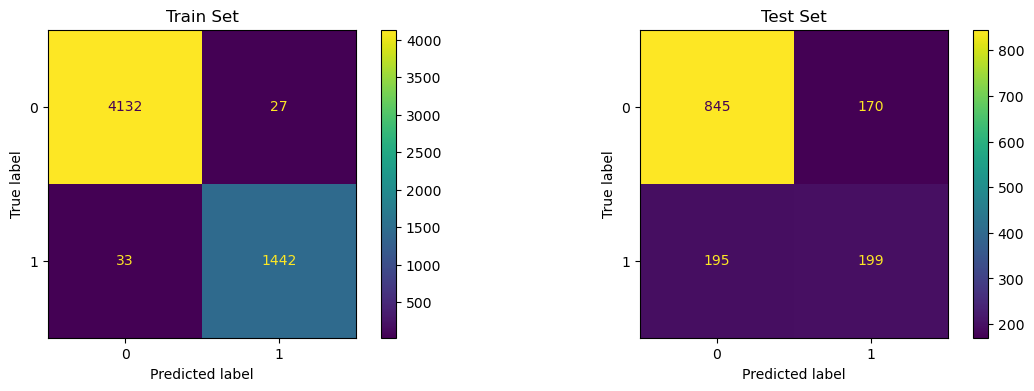

In [27]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [28]:
y = y.astype(int)
#run later after dummies 

In [29]:
model = KNeighborsClassifier(n_neighbors=2,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

In [30]:
y_pred

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

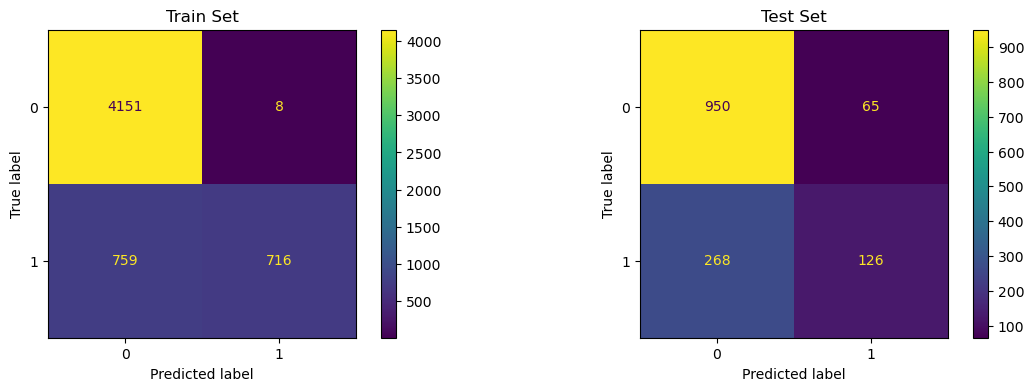

In [31]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [32]:
model = KNeighborsClassifier(n_neighbors=3,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

In [33]:
y_pred

array(['0', '0', '0', ..., '1', '0', '0'], dtype=object)

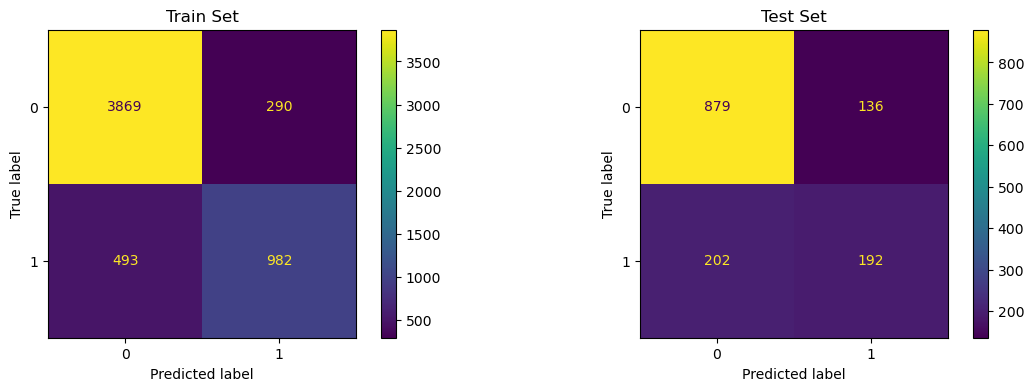

In [34]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [35]:
model = KNeighborsClassifier(n_neighbors=4,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

In [36]:
y_pred

array(['0', '0', '0', ..., '1', '0', '0'], dtype=object)

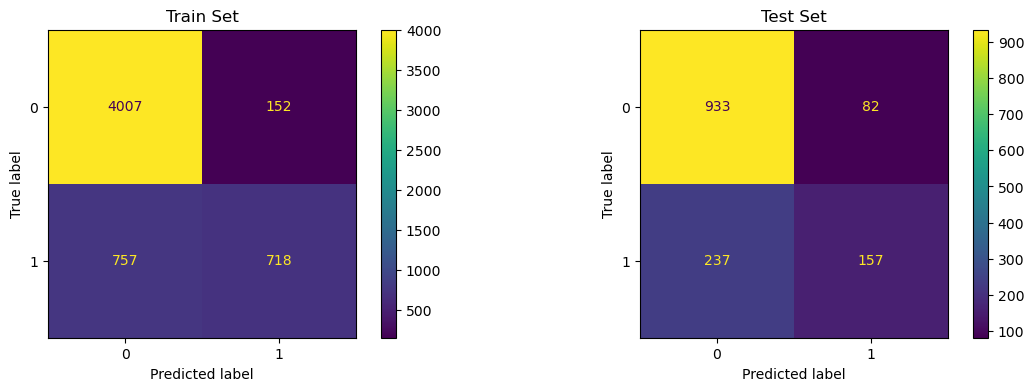

In [37]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [38]:
model = KNeighborsClassifier(n_neighbors=5,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

In [39]:
y_pred

array(['0', '0', '0', ..., '1', '0', '0'], dtype=object)

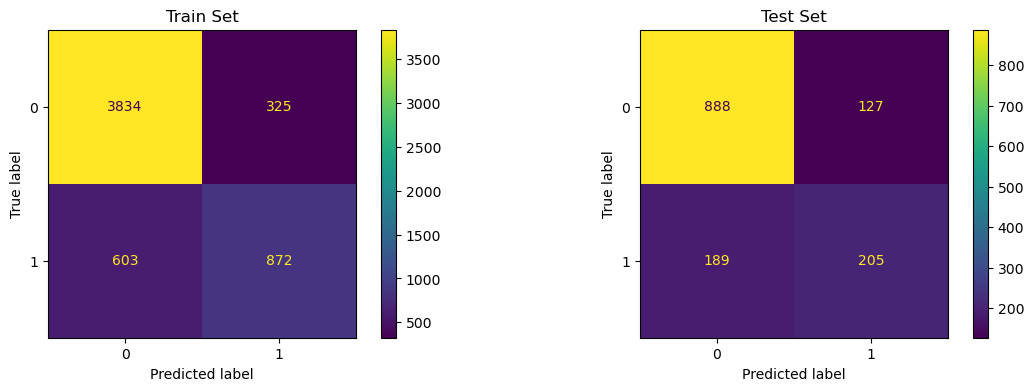

In [40]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [41]:
model = KNeighborsClassifier(n_neighbors=6,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

In [42]:
y_pred

array(['0', '0', '0', ..., '1', '0', '0'], dtype=object)

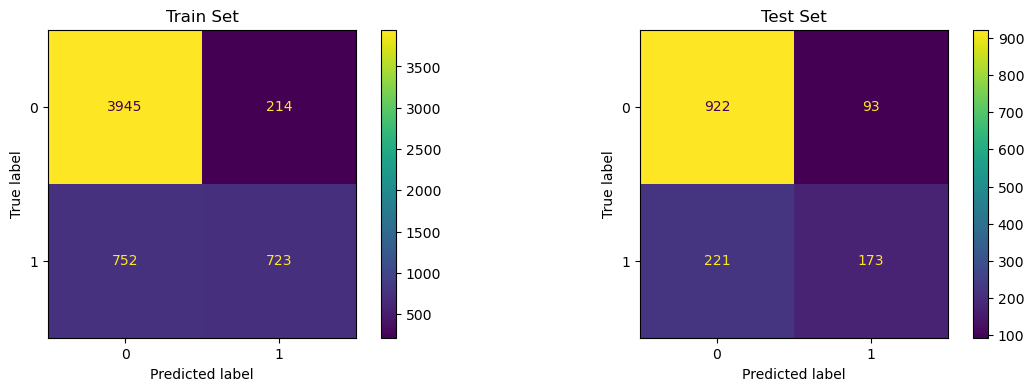

In [43]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [44]:
model = KNeighborsClassifier(n_neighbors=7,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

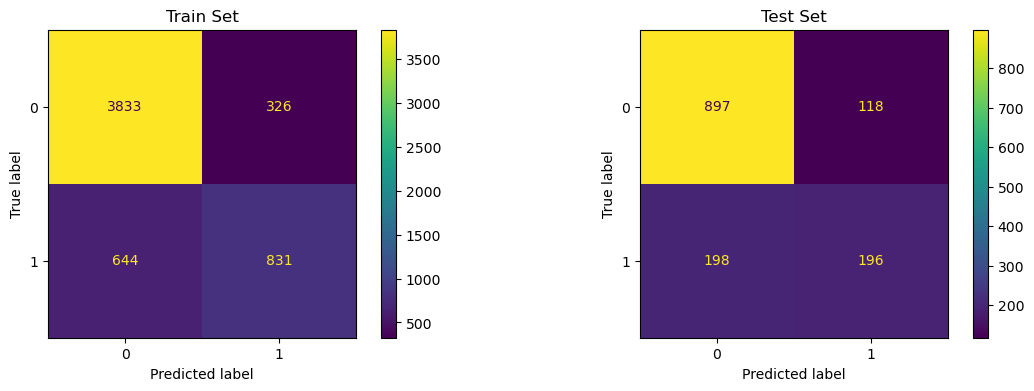

In [45]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [46]:
model = KNeighborsClassifier(n_neighbors=8,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

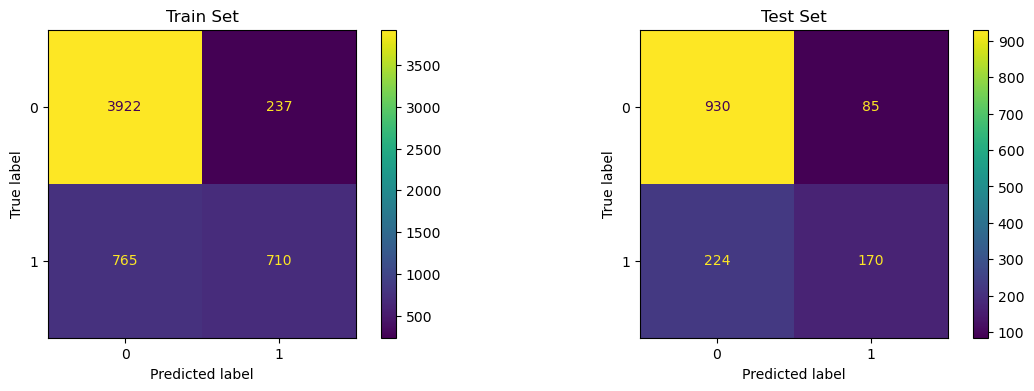

In [47]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [48]:
model = KNeighborsClassifier(n_neighbors=9,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

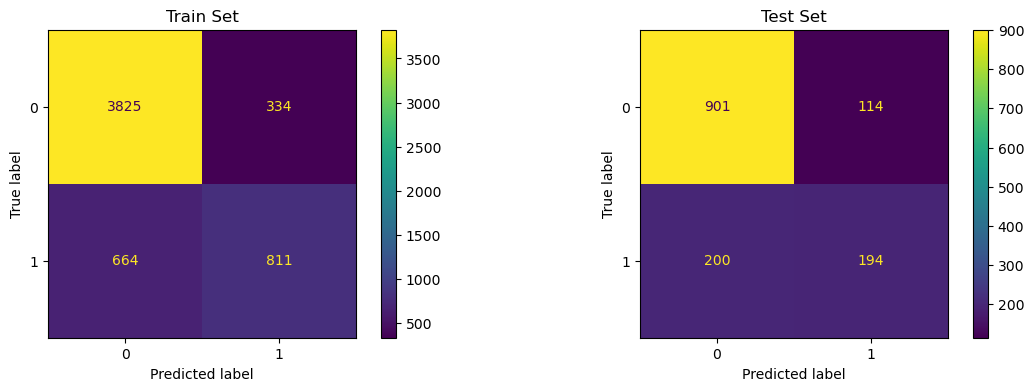

In [49]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [50]:
model = KNeighborsClassifier(n_neighbors=10,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

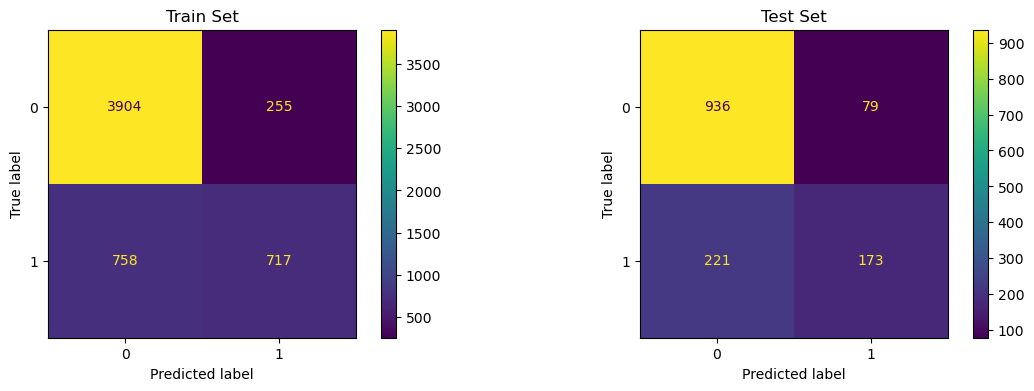

In [51]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [52]:
model = KNeighborsClassifier(n_neighbors=11,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

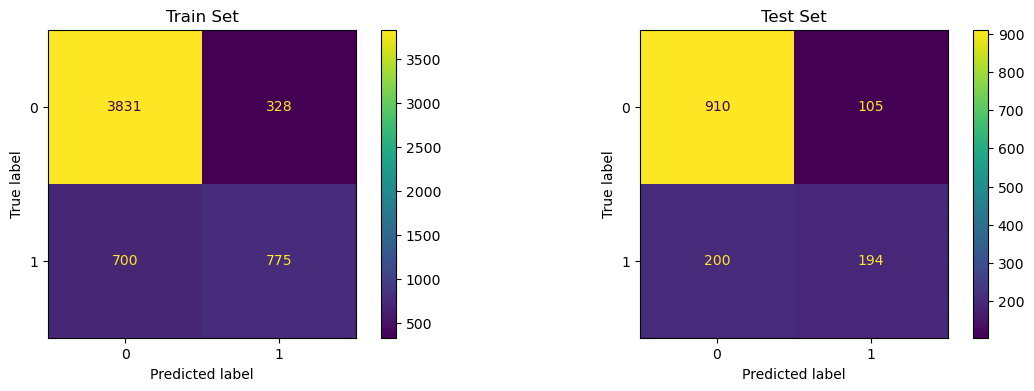

In [53]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [54]:
model = KNeighborsClassifier(n_neighbors=12,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

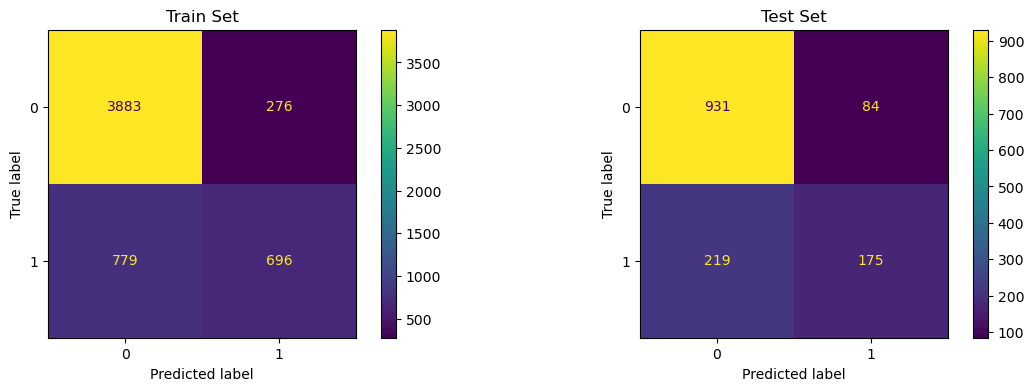

In [55]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [56]:
model = KNeighborsClassifier(n_neighbors=13,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

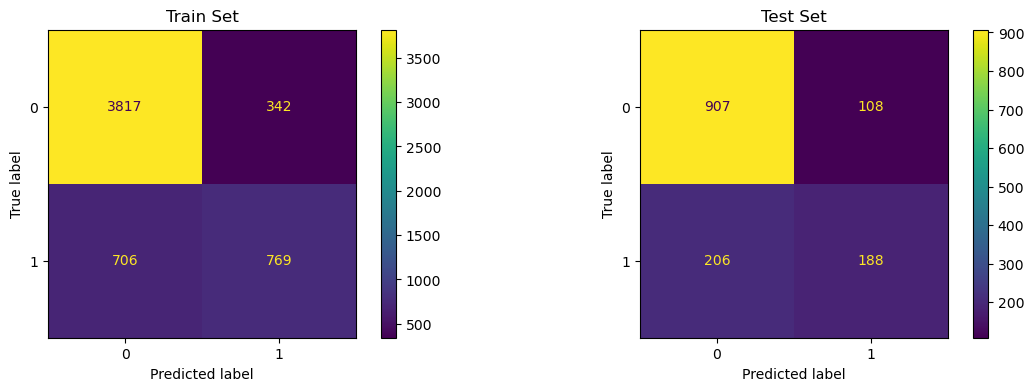

In [57]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [58]:
model = KNeighborsClassifier(n_neighbors=14,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

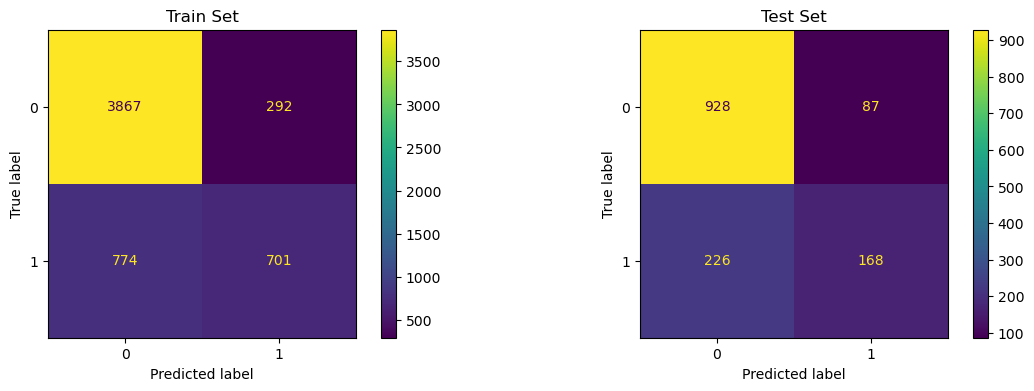

In [59]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [60]:
model = KNeighborsClassifier(n_neighbors=15,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

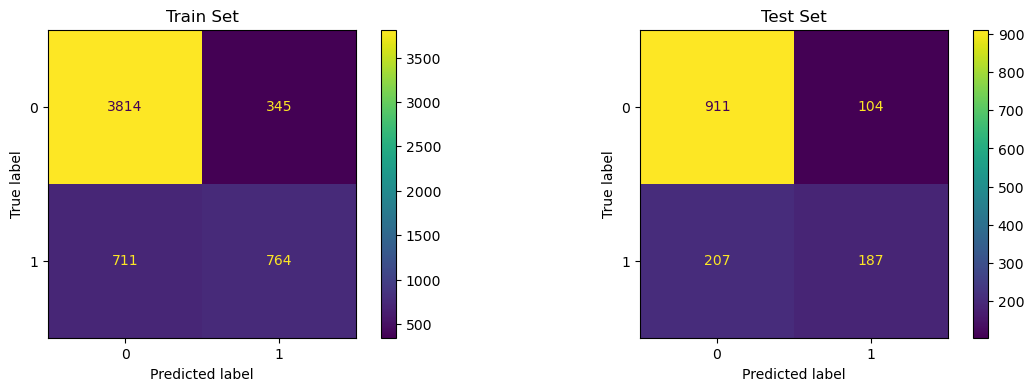

In [61]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

,Error_metric,Train,Test
0,Accuracy,0.793042,0.781405
1,Precision,0.657172,0.672000
2,Recall,0.437966,0.426396


Confusion matrix for the train set
[[3822  337]
 [ 829  646]]


Confusion matrix for the test set
[[933  82]
 [226 168]]


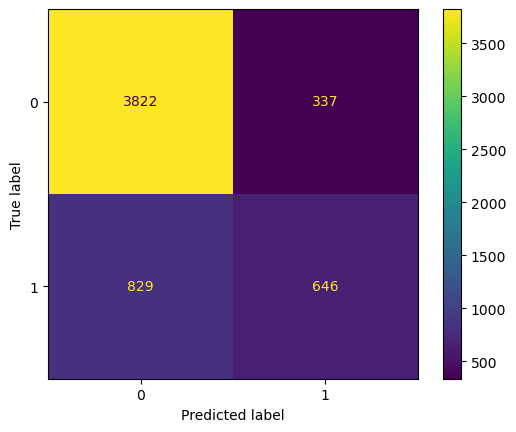

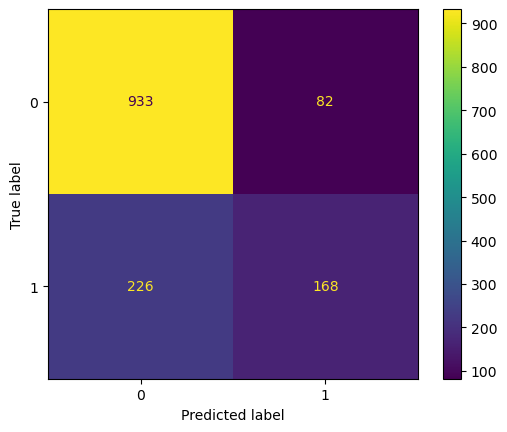

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log_model = LogisticRegression() 

## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')


print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')


In [63]:
#create a function for each one of the case we will check accuracy precision and recall for the lab. 
#from 1 to 8
#optional)Fit a logistic Regression model on the training data.
#Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.
#Round 2

#Fit a Decision Tree Classifier on the training data.
#Check the accuracy on the test data.


,Error_metric,Train,Test
0,Accuracy,0.787018,0.778514
1,Precision,0.647904,0.662500
2,Recall,0.417116,0.370629


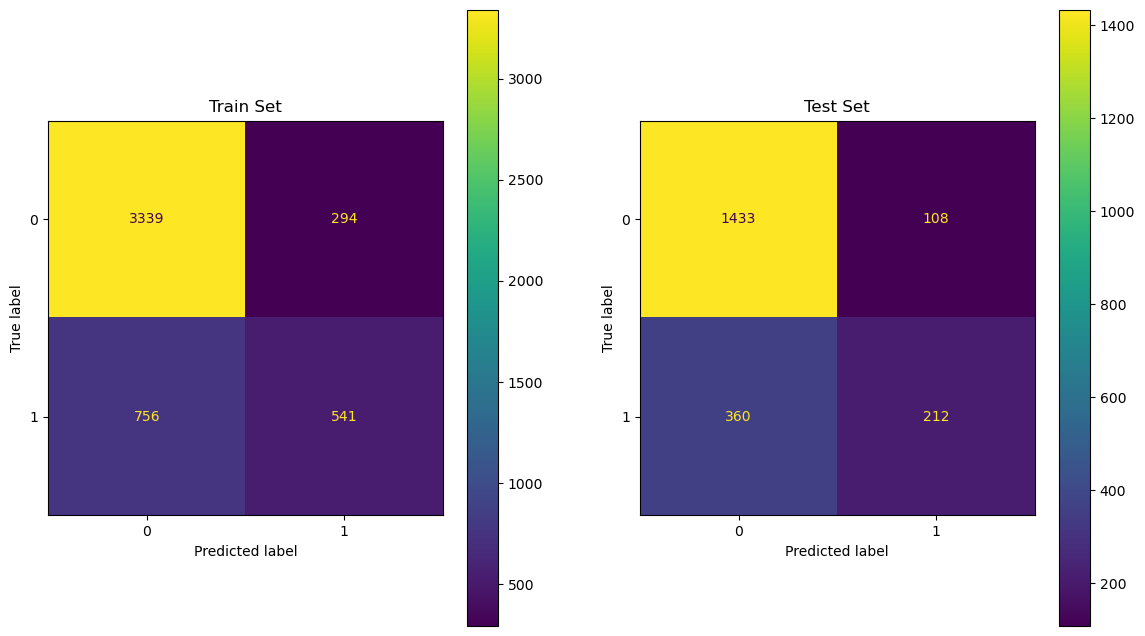

In [64]:
#decision tree fit 

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [65]:
from sklearn.metrics import accuracy_score
import numpy as np


accuracies = np.zeros(8)


for k in range(1, 9):
 
    dt = DecisionTreeClassifier(max_depth=k)
  
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    accuracies[k-1] = accuracy
    
    print("k=%d, accuracy=%.2f%%" % (k, accuracy * 100))

best_k = np.argmax(accuracies) + 1
print("Best value of k:", best_k)

k=1, accuracy=72.93%
k=2, accuracy=77.85%
k=3, accuracy=77.85%
k=4, accuracy=78.18%
k=5, accuracy=77.43%
k=6, accuracy=77.00%
k=7, accuracy=77.38%
k=8, accuracy=77.38%
Best value of k: 4


In [66]:
accuracies = np.zeros(8)

In [67]:
accuracies

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [68]:
#apply K-fold cross validation on your models before and check the model score. Note: So far we have not 
#balanced the data.


In [77]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=TT_SPLIT,random_state=RAND_STATE)

In [78]:
churnData['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [73]:
!pip install imbalanced-learn


In [74]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [75]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [82]:
category_1 = churnData[churnData['Churn'] == "Yes"]
category_0 = churnData[churnData['Churn'] == "No"]

In [83]:
c0_len = len(category_0)
c1_len = len(category_1)
c0_len,c1_len

(5174, 1869)

In [84]:
category_1_up = category_1.sample(c0_len, replace=True) # replace=True allows sampling of the same row more than once.
print(category_1_up.shape)

(5174, 16)


In [85]:
category_0

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,No,Yes,No,No,Yes,No,Month-to-month,89.10,1949.4,No
7,Female,0,No,No,10,No,Yes,No,No,No,No,No,Month-to-month,29.75,301.9,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,21.15,1419.4,No
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No


In [86]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

print("X_train has %d rows and %d columns"  %(X_train.shape[0],X_train.shape[1]))
print("-----------------------------------")
print("The coefficient of determination for the test data is R2=%.2f"
      %(model.score(X_test, y_test)))
print("The coefficient of determination for the train data is R2=%.2f"
      %(model.score(X_train, y_train)))


X_train has 5634 rows and 4 columns
-----------------------------------
The coefficient of determination for the test data is R2=-0.34
The coefficient of determination for the train data is R2=0.97


In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

scores=cross_val_score(model, X_train, y_train, cv=5)  #cv is the number of k fold 
print("Cross validation scores: ", scores)  #cross validation score is r square
print("Score stats: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Cross validation scores:  [-0.51228649 -0.44296696 -0.43061107 -0.42145994 -0.43824099]
Score stats: -0.45 accuracy with a standard deviation of 0.03
